# Machine Learning Model Deployment for Fraud Detection

In my analysis notebook for this dataset, I identified the factors for detecting a fraud transaction. 

In this notebook, I will deploy machine learning models to predict frauds

## Since this is a classification problem, I will be using:
1. Logistic Regression
2. k-Nearest Neighbors
3. Random Forest Classifier
4. Support Vector Machine

In [1]:
# Importing Analysis Libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for saving the model
import pickle

In [2]:
# Importing ML Libraries

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_absolute_error

In [3]:
df = pd.read_csv('fraud_dataset_example.csv')

In [4]:
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## Feature Selection

In [5]:
# Label encoding for 'type' column
from sklearn.preprocessing import LabelEncoder

l = LabelEncoder()
df['type_code'] = l.fit_transform(df['type'])

type_code is now the numeric representation of type column. Guide:

0 = CASH_IN
1 = CASH_OUT
2 = DEBIT
3 = PAYMENT
4 = TRANSFER

In [6]:
# Dropping isFlaggedFraud since it is false in all rows and also dropping 'type' since we now have type_code
X = df.drop(['isFlaggedFraud', 'isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)

y = df['isFraud']

In [7]:
def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y)
mi_scores[:10]

step              0.005549
newbalanceOrig    0.003916
amount            0.001432
newbalanceDest    0.001042
type_code         0.000000
oldbalanceDest    0.000000
oldbalanceOrg     0.000000
Name: MI Scores, dtype: float64

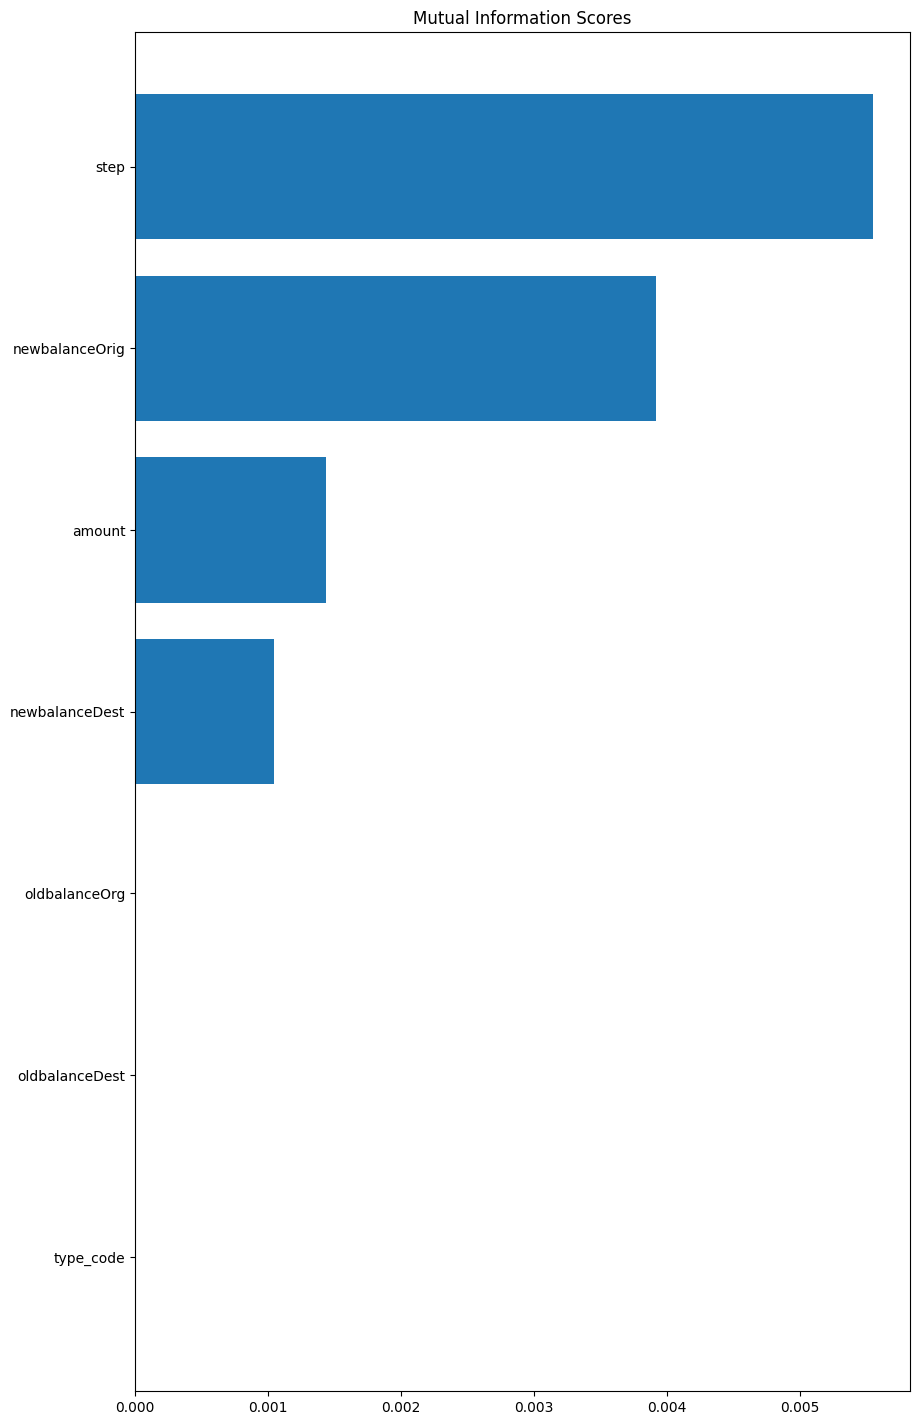

In [8]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(10, 18))
plot_mi_scores(mi_scores)

As we can see that oldbalanceDest has the highest score amongst others, followed by amount, newbalanceOrig, newbalanceDest, oldbalanceOrg

## Train Test Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)

Training dataset shape: (68080, 7) (68080,)
Testing dataset shape: (33533, 7) (33533,)


## Logistic Regression

In [10]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, lr_pred))
print('MSE:', metrics.mean_squared_error(y_test, lr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))

print(classification_report(y_test, lr_pred))

MAE: 0.0008648197298183879
MSE: 0.0008648197298183879
RMSE: 0.029407817494985715
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33502
           1       0.75      0.10      0.17        31

    accuracy                           1.00     33533
   macro avg       0.87      0.55      0.59     33533
weighted avg       1.00      1.00      1.00     33533



## k-Nearest Neighbors

In [11]:
knc = KNeighborsClassifier(n_neighbors=3)
knc.fit(X, y)
knc_pred = knc.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, knc_pred))
print('MSE:', metrics.mean_squared_error(y_test, knc_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knc_pred)))

print(classification_report(y_test, knc_pred))

MAE: 0.0005069632898935377
MSE: 0.0005069632898935377
RMSE: 0.022515845307106232
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33502
           1       0.89      0.52      0.65        31

    accuracy                           1.00     33533
   macro avg       0.94      0.76      0.83     33533
weighted avg       1.00      1.00      1.00     33533



## Random Forest Classifier

In [12]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, rf_pred))
print('MSE:', metrics.mean_squared_error(y_test, rf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))

print(classification_report(y_test, rf_pred))

MAE: 0.0005367846598872753
MSE: 0.0005367846598872753
RMSE: 0.023168613680737898
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33502
           1       0.88      0.48      0.62        31

    accuracy                           1.00     33533
   macro avg       0.94      0.74      0.81     33533
weighted avg       1.00      1.00      1.00     33533



In [13]:
print('Model Performance')
accuracy = metrics.accuracy_score(y_test, rf_pred)
print("Test Accuracy: ", accuracy * 100, "%")

print('Train Accuracy:\n {}\n'.format(rf.score(X_train, y_train)))

Model Performance
Test Accuracy:  99.94632153401128 %
Train Accuracy:
 1.0



**k-Nearest Neighbors seems to have the better prediction**

## Saving the model

In [14]:
pickle.dump(knc, open('model.pkl','wb'))